## Data Exploring

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [2]:
train_features = pd.read_csv('train_features.csv')
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [3]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [4]:
train_salaries = pd.read_csv('train_salaries.csv')
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
train_merge = pd.merge(train_features, train_salaries, on='jobId')
train_merge.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [6]:
print('----Check whether there is null----\n', train_merge.isnull().all(axis=0))
print('----Check continous variables----\n', train_merge.describe())
print('----Check whether there is duplication----\n', train_merge.duplicated().all(axis=0))

----Check whether there is null----
 jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
salary                 False
dtype: bool
----Check continous variables----
        yearsExperience  milesFromMetropolis          salary
count   1000000.000000       1000000.000000  1000000.000000
mean         11.992386            49.529260      116.061818
std           7.212391            28.877733       38.717936
min           0.000000             0.000000        0.000000
25%           6.000000            25.000000       88.000000
50%          12.000000            50.000000      114.000000
75%          18.000000            75.000000      141.000000
max          24.000000            99.000000      301.000000
----Check whether there is duplication----
 False


0 exists in salary, it should be dropped later

In [8]:
jobtype_counts = train_features['jobType'].value_counts()
print('----Job type counts----\n',jobtype_counts)

degree_counts = train_features['degree'].value_counts()
print('----Degree counts----\n',degree_counts)

major_counts = train_features['major'].value_counts()
print('----Major counts----\n',major_counts)

industry_counts = train_features['industry'].value_counts()
print('----Industry counts----\n',industry_counts)

----Job type counts----
 SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64
----Degree counts----
 HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64
----Major counts----
 NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64
----Industry counts----
 WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


1. The number of high school is less than NONE major, which means degree higher high school got NONE major.
2. High school + NONE in degree < NONE in major, which means there might be missing values in major. 

In [9]:
print('----Check mean salary of each degree----\n', train_merge['salary'].groupby(train_merge['degree']).mean())

----Check mean salary of each degree----
 degree
BACHELORS      125.454663
DOCTORAL       135.489433
HIGH_SCHOOL    101.920654
MASTERS        130.504903
NONE            98.176467
Name: salary, dtype: float64


## Visualize features

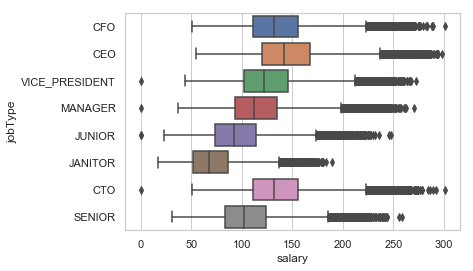

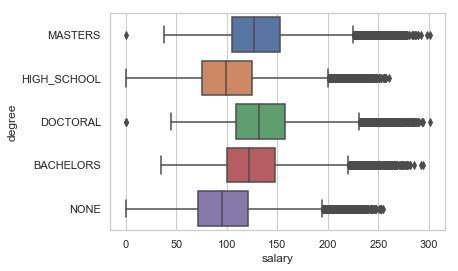

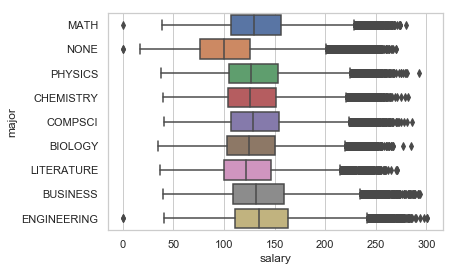

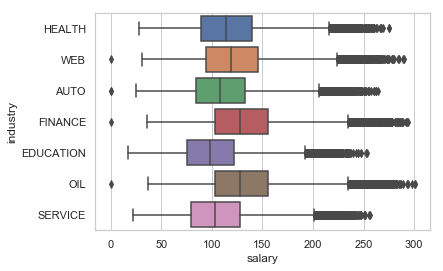

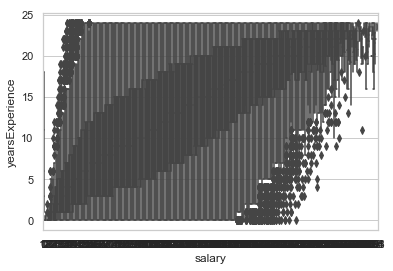

In [10]:
for i, feature in enumerate(train_merge.columns.values[2:-2]):
    plt.figure(i)
    sns.boxplot(x='salary', y=str(feature), data=train_merge)

## Data Preprocess    

In [11]:
train_merge = train_merge[train_merge['salary']!=0]
train_merge.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


5 rows with 0 salary have been dropped.

In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures,LabelEncoder

In [13]:
def data_preprocessing(data):
        #label encoder
        labels = []
        le1 = LabelEncoder()
        le1.fit(data['jobId'])
        data['jobId']=le1.transform(data['jobId'])
        labels.append(le1)
        
        le2 = LabelEncoder()
        le2.fit(data['companyId'])
        data['companyId']=le2.transform(data['companyId'])
        labels.append(le2)
        
        le3 = LabelEncoder()
        le3.fit(data['jobType'])
        data['jobType']=le3.transform(data['jobType'])
        labels.append(le3)
            
        le4 = LabelEncoder()
        le4.fit(data['degree'])
        data['degree']=le4.transform(data['degree'])
        labels.append(le4)
            
        le5 = LabelEncoder()
        le5.fit(data['major'])
        data['major']=le5.transform(data['major'])
        labels.append(le5)
            
        le6 = LabelEncoder()
        le6.fit(data['industry'])
        data['industry']=le6.transform(data['industry'])
        labels.append(le6)
           
        return data
            

In [14]:
train_raw = data_preprocessing(train_merge)

In [15]:
train_x = train_raw.drop(['salary'], axis=1)
train_y = train_raw['salary']

In [16]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
train_poly = poly.fit_transform(train_x)
train_df = pd.DataFrame(train_poly).copy()
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,31.0,1.0,3.0,6.0,3.0,10.0,83.0,0.0,...,18.0,9.0,30.0,249.0,18.0,60.0,498.0,30.0,249.0,830.0
1,1.0,1.0,11.0,0.0,2.0,7.0,6.0,3.0,73.0,11.0,...,14.0,12.0,6.0,146.0,42.0,21.0,511.0,18.0,438.0,219.0
2,1.0,2.0,48.0,7.0,1.0,8.0,3.0,10.0,38.0,96.0,...,8.0,3.0,10.0,38.0,24.0,80.0,304.0,30.0,114.0,380.0
3,1.0,3.0,32.0,5.0,1.0,2.0,0.0,8.0,17.0,96.0,...,2.0,0.0,8.0,17.0,0.0,16.0,34.0,0.0,0.0,136.0
4,1.0,4.0,60.0,7.0,0.0,8.0,2.0,8.0,16.0,240.0,...,0.0,0.0,0.0,0.0,16.0,64.0,128.0,16.0,32.0,128.0


## Model and Evaluation

In [17]:
from numpy.core.umath_tests import inner1d
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

c:\users\jelly\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  """Entry point for launching an IPython kernel.


In [18]:
def predict_models():
    model = []
    model.append(('LinearRegression', LinearRegression()))
    model.append(('Lasso', Lasso()))
    model.append(('Ridge', Ridge()))
    model.append(('RandomForestRegressor', RandomForestRegressor()))
    model.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
    model.append(('MLPRegressor', MLPRegressor()))
    
    result = []
    names = []
    for name, mod in model:
        kf = KFold(n_splits=5, random_state=7)
        cv = cross_val_score(mod, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        result.append(cv)
        names.append(name)
        rmse = (cv.mean()*-1)**0.5
        print('Model: %s; RMSE: %f' % (name, rmse))

In [19]:
train_data = train_df[train_df.columns.tolist()]
train_data.shape

(999995, 37)

In [20]:
scaler = StandardScaler()
train_sc = scaler.fit_transform(train_data)
df = pd.DataFrame(train_sc)

In [114]:
from sklearn.model_selection import train_test_split
data_y = train_raw['salary']
#data_x = train_x[[col for col in train_x.columns if col not in ['jobId', 'companyId']]]
x_train, x_test, y_train, y_test = train_test_split(df.values, data_y.values, test_size=0.3)

In [21]:
model_results = predict_models(df)

Model: LinearRegression; RMSE: 29.810161
Model: Lasso; RMSE: 30.118961
Model: Ridge; RMSE: 29.810161
Model: RandomForestRegressor; RMSE: 20.780949
Model: DecisionTreeRegressor; RMSE: 27.792605
Model: MLPRegressor; RMSE: 19.226004


Choose the model with the lowest RMSE: Multi-layer Perceptron regressor as the final model

In [37]:
clf = MLPRegressor()
clf.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [127]:
pred_y = clf.predict(x_test)
from sklearn.metrics import mean_squared_error
print('RMSE of test data is:', str(mean_squared_error(y_test, pred_y) ** 0.5))

RMSE of test data is: 26.83610703976666


In [115]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [128]:
pred_y = rf.predict(x_test)
from sklearn.metrics import mean_squared_error
print('RMSE of test data is:', str(mean_squared_error(y_test, pred_y) ** 0.5))

RMSE of test data is: 20.733341876589773


### Find the importance of each feature

In [46]:
columns=poly.get_feature_names()
print(columns)
print(len(columns))

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x4 x5', 'x4 x6', 'x4 x7', 'x5 x6', 'x5 x7', 'x6 x7']
37


In [122]:
var, important_col=[],[]
for i in range(8):
    var.append('x'+str(i))
var_dict=dict(zip(var,train_features.columns))
print(var_dict) 
    
for i in poly.get_feature_names()[1:]:
    if len(i.split(' '))==1:
        important_col.append(var_dict[i])
    else:
        ls=""
        for j in i.split(' '):
            ls=ls+" "+var_dict[j]
        important_col.append(ls)
        var_dict[i]=ls
print(important_col)

{'x0': 'jobId', 'x1': 'companyId', 'x2': 'jobType', 'x3': 'degree', 'x4': 'major', 'x5': 'industry', 'x6': 'yearsExperience', 'x7': 'milesFromMetropolis'}
['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis', ' jobId companyId', ' jobId jobType', ' jobId degree', ' jobId major', ' jobId industry', ' jobId yearsExperience', ' jobId milesFromMetropolis', ' companyId jobType', ' companyId degree', ' companyId major', ' companyId industry', ' companyId yearsExperience', ' companyId milesFromMetropolis', ' jobType degree', ' jobType major', ' jobType industry', ' jobType yearsExperience', ' jobType milesFromMetropolis', ' degree major', ' degree industry', ' degree yearsExperience', ' degree milesFromMetropolis', ' major industry', ' major yearsExperience', ' major milesFromMetropolis', ' industry yearsExperience', ' industry milesFromMetropolis', ' yearsExperience milesFromMetropolis']


In [125]:
coefficient = pd.concat([pd.DataFrame(significant_col), pd.DataFrame(np.transpose(rf.feature_importances_[1:]))], axis=1)
coefficient.columns = [['Feature', 'Importance']]
print('----Importance of each feature----\n', coefficient)

----Importance of each feature----
                                  Feature Importance
0                                  jobId   0.006922
1                              companyId   0.005184
2                                jobType   0.263189
3                                 degree   0.001561
4                                  major   0.007608
5                               industry   0.031276
6                        yearsExperience   0.056194
7                    milesFromMetropolis   0.043283
8                        jobId companyId   0.018091
9                          jobId jobType   0.009466
10                          jobId degree   0.012109
11                           jobId major   0.011622
12                        jobId industry   0.008353
13                 jobId yearsExperience   0.014412
14             jobId milesFromMetropolis   0.015570
15                     companyId jobType   0.007707
16                      companyId degree   0.009830
17                       com

## Prediction on test data

In [80]:
test_features = pd.read_csv('test_features.csv')
test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [8]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [75]:
test_raw = data_preprocessing(test_features)

In [76]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
test_poly = poly.fit_transform(test_raw)
test_df = pd.DataFrame(test_poly).copy()
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,27.0,5.0,2.0,7.0,3.0,22.0,73.0,0.0,...,14.0,6.0,44.0,146.0,21.0,154.0,511.0,66.0,219.0,1606.0
1,1.0,1.0,5.0,4.0,4.0,7.0,0.0,20.0,47.0,5.0,...,28.0,0.0,80.0,188.0,0.0,140.0,329.0,0.0,0.0,940.0
2,1.0,2.0,2.0,2.0,3.0,0.0,3.0,17.0,9.0,4.0,...,0.0,9.0,51.0,27.0,0.0,0.0,0.0,51.0,27.0,153.0
3,1.0,3.0,14.0,5.0,2.0,7.0,4.0,14.0,96.0,42.0,...,14.0,8.0,28.0,192.0,28.0,98.0,672.0,56.0,384.0,1344.0
4,1.0,4.0,30.0,4.0,1.0,0.0,4.0,10.0,44.0,120.0,...,0.0,4.0,10.0,44.0,0.0,0.0,0.0,40.0,176.0,440.0


In [77]:
scaler = StandardScaler()
test_sc = scaler.fit_transform(test_df)
test_data = pd.DataFrame(test_sc)

In [129]:
y_pred = rf.predict(test_data)

In [130]:
test_y = pd.concat([test_features['jobId'], pd.DataFrame({'salary': np.round(y_pred, 0).astype(int)})], axis=1)
test_y.head()

,jobId,salary
0,JOB1362685407687,108
1,JOB1362685407688,84
2,JOB1362685407689,190
3,JOB1362685407690,99
4,JOB1362685407691,123


In [131]:
test_y.to_csv('test_salaries.csv', index=False)